In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import math
# from bresenham import bresenham
import pybresenham as bresenham

# import torch
# from transformers import GLPNImageProcessor, AutoImageProcessor, GLPNForDepthEstimation
# from PIL import Image
# import open3d as o3d

(400, 300, 3)
[31 31 31]


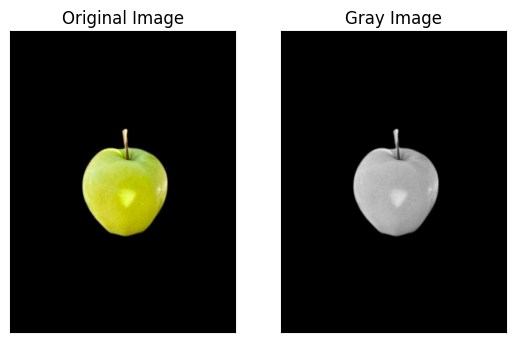

In [2]:
#remove bg first externally as grabCut removes channel data
img0 = cv.imread('images/apple2.jpg')
RGB_img = cv.cvtColor(img0, cv.COLOR_BGR2RGB)
#gray = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)

#Grayscale 
gray = RGB_img.copy()

for y in range(len(gray)):
    for x in range(len(gray[y])):
        #print(gray[x][y][0], gray[x][y])
        r = gray[y][x][0]
        g = gray[y][x][1]
        b = gray[y][x][2]
        #print(r,g,b)
        # gr = (r + g + b) / 3; // simple
        gr = r * 0.299 + g * 0.587 + b * 0.0114 #LUMA ratios

        gray[y][x][0] = gray[y][x][1] = gray[y][x][2] = gr

print(gray.shape)
print(gray[156][143])

plt.subplot(121),plt.imshow(RGB_img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(gray)
plt.title('Gray Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [3]:
# imgL = cv.cvtColor(gray, cv.COLOR_RGB2GRAY)
# imgR = gray.copy()
# imgR = cv.cvtColor(imgR, cv.COLOR_RGB2GRAY)

# depthMap = cv.StereoBM.create(numDisparities=16, blockSize=15)
# disparity = depthMap.compute(imgL,imgR)

# plt.subplot(121),plt.imshow(gray)
# plt.title('Gray Image'), plt.xticks([]), plt.yticks([])

# plt.subplot(122),plt.imshow(disparity)
# plt.title('Stereo Image'), plt.xticks([]), plt.yticks([])

# plt.show()

In [4]:
# #depth using transformers
# depth = gray.copy()
# #depth = np.zeros((400, 300, 3), dtype = np.uint8)

# #getting model
# # image_processor = GLPNImageProcessor.from_pretrained("vinvino02/glpn-nyu")
# # model = GLPNForDepthEstimation.from_pretrained("vinvino02/glpn-nyu")

# image_processor = AutoImageProcessor.from_pretrained("vinvino02/glpn-kitti")
# model = GLPNForDepthEstimation.from_pretrained("vinvino02/glpn-kitti")

# # prepare image for the model
# inputs = image_processor(images=depth, return_tensors="pt")

# with torch.no_grad():
#     outputs = model(**inputs)
#     predicted_depth = outputs.predicted_depth 

# # visualize 
# post_processed_output = image_processor.post_process_depth_estimation(
#     outputs, target_sizes=[(depth.shape[0], depth.shape[1])],
# )

# predicted_depth = post_processed_output[0]["predicted_depth"]
# depth = predicted_depth * 255 / predicted_depth.max()
# depth = depth.detach().cpu().numpy()


# plt.subplot(121),plt.imshow(gray)
# plt.title('Gray Image'), plt.xticks([]), plt.yticks([])

# plt.subplot(122),plt.imshow(depth)
# plt.title('Stereo Image'), plt.xticks([]), plt.yticks([])

# plt.show()

In [5]:
# depth = Image.fromarray(depth.astype("uint8"))
# depth_o3d = o3d.geometry.Image(depth)
# image_o3d = o3d.geometry.Image(RGB_img)
# rgbd_img = o3d.geometry.RGBDImage.create_from_color_and_depth(image_o3d, depth_o3d, convert_rgb_to_intensity=False)

# #camera settings
# camera_intrinsic = o3d.camera.PinholeCameraIntrinsic()
# camera_intrinsic.set_intrinsics(RGB_img.shape[1], RGB_img.shape[0], 500, 500, RGB_img.shape[1]/2, RGB_img.shape[0]/2)

# #generate point cloud
# pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_img, camera_intrinsic)
# o3d.visualization.draw_geometries([pcd])

In [6]:
# import sys
# coords = np.asarray(pcd.points)
# # coords = np.arange(1001)
# np.set_printoptions(threshold=sys.maxsize)

# with open("coords.txt", "w") as f:
#     f.writelines(str(coords))

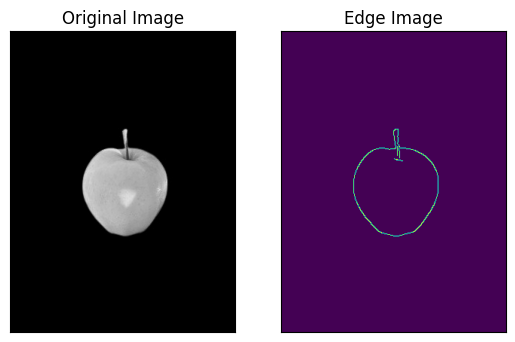

True

In [3]:
# img = cv.imread('apple.jpg')
# assert img is not None, "file could not be read, check with os.path.exists()"

#Interactive Foreground Extraction using GrabCut Algorithm
# mask = np.zeros(gray.shape[:2],np.uint8)
 
# bgdModel = np.zeros((1,65),np.float64)
# fgdModel = np.zeros((1,65),np.float64)
 
# rect = (50,100,255,290)
# #cv.rectangle(img, (50,100), (255,290), (255, 0, 0), 1)
# cv.grabCut(gray,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
 
# mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
# img = gray*mask2[:,:,np.newaxis]

edges = cv.Canny(gray,300,400)


# #Edge detection
# import math
# edges = gray.copy()

# #horizontal edge detection / vertical lines
# matrixY = [ 
#     [1, 2, 1],
#     [0, 0, 0],
#     [1, 2, 1]
# ]
# #vertical edge detection / horizontal lines
# matrixX = [
#     [1, 0, 1],
#     [2, 0, 2],
#     [1, 0, 1]
# ]

# def convolution(y, x, matrix, img):
#     totalRed = 0;
#     totalGreen = 0;
#     totalBlue = 0;
#     offset = math.floor((len(matrix) / 2));

#     #convolution matrix loop
#     for i in range(len(matrix)):
#         for j in range(len(matrix[i])):
#             #Get pixel loc within convolution matrix
#             yloc = y + i - offset
#             xloc = x + j - offset
            
#             #index = (yloc + img.width * xloc) * 4;
#             #ensure we don't address a pixel that doesn't exist
#             # cY = min(yloc, max(0, len(img) - 1));
#             # cX = min(xloc, max(0, len(img) - 1));

#             #multiply all values with the mask and sum up
#             totalRed += edges[yloc-1][xloc-1][0] * matrix[i][j]
#             # totalGreen += img[yloc-1][xloc-1][1] * matrix[i][j]
#             # totalBlue += img[yloc-1][xloc-1][2] * matrix[i][j]

#     #return the new color as an array
#     return [totalRed]

# for y in range(len(edges)):
#   for x in range(len(edges[y])):
#       #print(convolution(y,x,matrixX, edges))
      
#       cX = convolution(y, x, matrixY, edges)
#       cY = convolution(y, x, matrixX, edges)
    
#       # cX = map(abs(cX[0]), 0, 1020, 0, 255)
#       # cY = map(abs(cY[0]), 0, 1020, 0, 255)
#       combo = cX[0] + cY[0];

#       #print(cX[0], cY[0], combo)
    
#       edges[y][x][0] = combo;
#       edges[y][x][1] = combo;
#       edges[y][x][2] = combo;

        #print(edges[y][x])
     

plt.subplot(121),plt.imshow(gray)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

#plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.subplot(122),plt.imshow(edges)
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
 
plt.show()
cv.imwrite('edgesImg.jpg', edges)

In [4]:
arr = []

for y in range(len(edges)):
    for x in range(len(edges[y])):
        if edges[y][x] == 255:
            #display white values
            #print(y,x, edges[x][y]) 

            arr.append((y,x)) #row - y, col - x
# print(arr)
    

(Text(0.5, 1.0, 'Dot Image'), ([], []), ([], []))

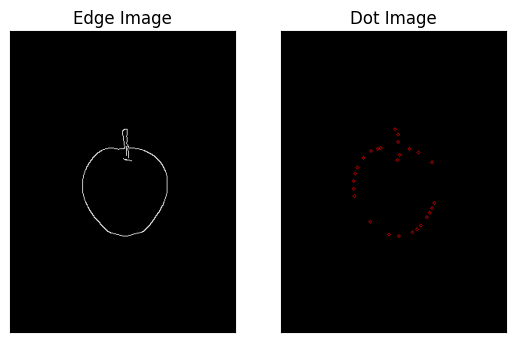

In [5]:
#show what principle will the vertices creation follow
dotImg = np.zeros((400, 300, 3), dtype = np.uint8)

outVerts = []

#even only
poly = 20

for i in arr[::poly]: #start ind:end ind:step, resolution=10
    cv.circle(dotImg, (i[1],i[0]), 2, (255, 0, 0)) #do the same for vertices (initially 2d)
    outVerts.append((i[1], i[0]))

plt.subplot(121),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(dotImg)
plt.title('Dot Image'), plt.xticks([]), plt.yticks([])

# print(outVerts)

In [6]:
#dist creation (problem with arr2, erases some important vals, fix?)
# dist = 0

# #couple opposite vertices together based on the same y value
arr2 = []

for i in range(len(arr))[::poly]:
    for j in range(len(arr)):
        if (arr[i][0] == arr[j][0]):
            if (arr[i] != arr[j]):
                arr2.append(arr[i])
                arr2.append(arr[j])
                break

# print('Arr2: ', arr2)
# print('Len: ', len(arr2))

# cv.circle(dotImg, (arr2[7][1],arr2[7][0]), 5, (255, 255, 255))
# plt.subplot(121),plt.imshow(dotImg)
# plt.title('Dot Image'), plt.xticks([]), plt.yticks([])

In [7]:
#find distance between opposite vertices
distArr = []

for i in range(len(arr2)):
    n = i+1
    if (i == 0):
        dist = arr2[i][1] - arr2[n][1]
        distArr.append(abs(dist))
    else:
        if (len(arr2) % 2 != 0):
            if (n % 2 == 0 and n != len(arr2)-1):
                dist = arr2[n][1] - arr2[n+1][1]
                distArr.append(abs(dist))
        else:
            if (n % 2 == 0 and n != len(arr2)):
                dist = arr2[n][1] - arr2[n+1][1]
                distArr.append(abs(dist))
print('distArr: ', distArr)
print(len(distArr))


distArr:  [1, 6, 4, 2, 2, 44, 1, 66, 44, 1, 47, 95, 102, 109, 112, 112, 110, 103, 96, 90, 82, 1, 64, 54, 43, 2, 7]
27


(Text(0.5, 1.0, 'Line Image'), ([], []), ([], []))

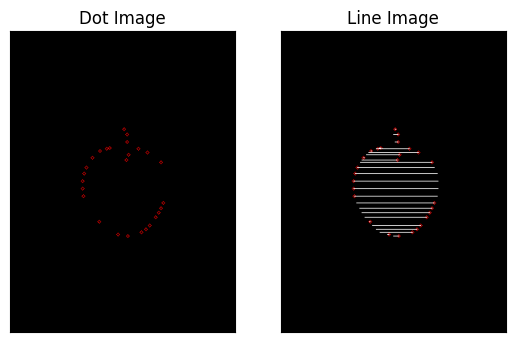

In [8]:
#find coords of lines connecting opposite verteces (apply Bresenham algorithm)
lineImg = dotImg.copy()
arr3 = []
for i in range(len(arr2)):
    n = i+1
    if (i == 0):
        cv.line(lineImg, (arr2[i][1], arr2[i][0]), (arr2[n][1], arr2[n][0]), (255, 255, 255), 1)
        #arr3.append(list(bresenham(arr2[n][1], arr2[n][0], arr2[n+1][1], arr2[n+1][0]))) #why this?
        arr3.append(list(bresenham.line(arr2[i][1], arr2[i][0], arr2[n][1], arr2[n][0])))
    else:
        if (len(arr2) % 2 != 0):
            if (n % 2 == 0 and n != len(arr2)-1):
                cv.line(lineImg, (arr2[n][1], arr2[n][0]), (arr2[n+1][1], arr2[n+1][0]), (255, 255, 255), 1)
                arr3.append(list(bresenham.line(arr2[n][1], arr2[n][0], arr2[n+1][1], arr2[n+1][0])))
        else:
            if (n % 2 == 0 and n != len(arr2)):
                cv.line(lineImg, (arr2[n][1], arr2[n][0]), (arr2[n+1][1], arr2[n+1][0]), (255, 255, 255), 1)
                arr3.append(list(bresenham.line(arr2[n][1], arr2[n][0], arr2[n+1][1], arr2[n+1][0])))

plt.subplot(121),plt.imshow(dotImg)
plt.title('Dot Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(lineImg)
plt.title('Line Image'), plt.xticks([]), plt.yticks([])

# print(arr3)

In [9]:
# print(len(arr3))
# print(arr3)
# print(len(distArr))

#creating depth by adding z coordinate
for i in range(len(arr3)):
    firstHalf = math.ceil(len(arr3[i])/2)
    secondHalf = len(arr3[i])-firstHalf
    # print(firstHalf, secondHalf)
    # print("Len :", len(arr3[i]), firstHalf, distArr[i])
    for j in range(len(arr3[i]))[:firstHalf:]:
        # print("First half: ")
        # print(arr3[i][j])
        arr3[i][j] += (j + len(arr3[i])/distArr[i],)
        # print(arr3[i][j])
        
    for j in range(len(arr3[i]))[firstHalf::]:
        # print("Second half: ")
        temp = (j-secondHalf)*2
        # print(temp)
        arr3[i][j] += (j + len(arr3[i])/distArr[i] - temp,)    
        # print(arr3[i][j])

# print(len(arr3[i])/distArr[1])
# print(arr3)

In [10]:
#create a mirror, backside of the object

(Text(0.5, 1.0, 'Full Dot Image'), ([], []), ([], []))

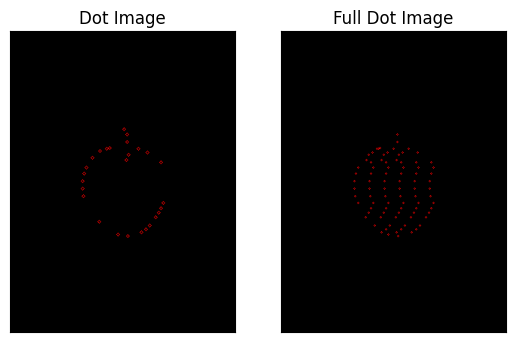

In [11]:
fullDotImg = np.zeros((400, 300, 3), dtype = np.uint8)

#blender code
verts = []

for i in range(len(arr3)):
    for j in range(len(arr3[i])-1)[1::poly]:
        verts.append([arr3[i][j][0], arr3[i][j][1], arr3[i][j][2]])
        #cv.circle(dotImg, (arr[i][1],arr[i][0]), 5, (255, 255, 255))
        cv.circle(fullDotImg, (arr3[i][j][0],arr3[i][j][1]), 1, (255, 0, 0)) #do the same for vertices (initially 2d)
    
plt.subplot(121),plt.imshow(dotImg)
plt.title('Dot Image'), plt.xticks([]), plt.yticks([])   

plt.subplot(122),plt.imshow(fullDotImg)
plt.title('Full Dot Image'), plt.xticks([]), plt.yticks([])

# print(verts)
# print(len(verts))

In [12]:
# couple opposite vertices together based on the same y value
# preparing array for edge creation
arr4 = []
temp = []
temp1 = []

#add the last singles
for i in range(len(verts)):
    for j in range(len(verts)):
        if (verts[i][1] == verts[j][1]):
            v = verts[i]
            # print(v, verts[j])
            if (verts[i] == verts[j]):
                # print("V1: ", v)
                temp1.append(v)
            if (verts[i] != verts[j]):
                # print("I: ", verts[i])
                if (len(temp1) > 0):
                    temp1.pop()
                    # print("Temp1: ", temp1)
                    for t in range(len(temp1)):
                        arr4.append(list([temp1[t]]))
                    temp1 = []
                if(verts[i][1] == verts[j][1]):
                    lastV = verts[i+1][1]
                    temp.append(verts[i])
                    if(len(temp) > 1 and verts[i][1] != verts[i-1][1] or verts[i][1] != lastV):
                        arr4.append(temp) 
                        temp = []
                    break

# print('Arr4: ', arr4)
# print('Len: ', len(arr4))            

Arr4:  [[[154, 137, 2.166666666666667]], [[154, 147, 2.25]], [[131, 155, 2.5]], [[127, 156, 2.5], [169, 156, 2.0227272727272725], [149, 156, 22.022727272727273], [129, 156, 4.022727272727273]], [[181, 161, 2.015151515151515], [161, 161, 22.015151515151516], [141, 161, 26.015151515151516], [121, 161, 6.015151515151516]], [[156, 164, 2.0227272727272725], [136, 164, 22.022727272727273], [116, 164, 4.022727272727273]], [[153, 171, 2.0212765957446805], [133, 171, 22.02127659574468], [113, 171, 8.02127659574468]], [[199, 174, 2.0105263157894737], [179, 174, 22.010526315789473], [159, 174, 42.01052631578948], [139, 174, 36.01052631578948], [119, 174, 16.010526315789477]], [[102, 181, 2.0098039215686274], [122, 181, 22.009803921568626], [142, 181, 42.009803921568626], [162, 181, 42.009803921568626], [182, 181, 22.009803921568633], [202, 181, 2.0098039215686327]], [[99, 189, 2.0091743119266052], [119, 189, 22.009174311926607], [139, 189, 42.00917431192661], [159, 189, 50.00917431192661], [179, 

In [13]:
# needs to be sorted, show in the report what happens when not sorted
for i in range(len(arr4)):
    for j in range(len(arr4[i])):
        arr4[i].sort()
# print(arr4)

In [14]:
# work with grayscale pixel data for z coord
from numpy import interp
for i in range(len(arr4)):
    for j in range(len(arr4[i])):
        x = arr4[i][j][0]
        y = arr4[i][j][1]
        z = arr4[i][j][2]
        gr = gray[y][x][0]
        # print(x, y, z, gr)

        if (gr < 127):
            z = interp(gray[y][x][0],[0,255],[z,z-(gray[y][x][0])/100])
            arr4[i][j][2] = float(z)
        else:
            z = interp(gray[y][x][0],[0,255],[z,z+(gray[y][x][0])/100])
            arr4[i][j][2] = float(z)
        # print(x, y, arr4[i][j][2])

# print(arr4)      

In [15]:
#blender ready verts arr
verts2 = []

for i in range(len(arr4)):
    for j in range(len(arr4[i])):
        verts2.append(arr4[i][j])
# print(verts2)
# print(len(verts2))

In [16]:
# smth = [
#  [{"id"=0, "data"=[154, 137, 2.166666666666667]}], 
#  [{"id"=1, "data"=[154, 147, 2.25]}], 
#  [{"id"=2, "data"=[131, 155, 2.5]}],

#  [{"id"=3, "data"=[127, 156, 2.5]}, 
#   {"id"=4, "data"=[129, 156, 4.022727272727273]}, 
#   {"id"=5, "data"=[149, 156, 22.022727272727273]}, 
#   {"id"=6, "data"=[169, 156, 2.0227272727272725]}
#  ]

# ]

arr5 = arr4
count = -1

for i in range(len(arr4)):
    for j in range(len(arr4[i])):
        count +=1
        arr5[i][j] = {"id": count, "data": arr4[i][j], "fitness_val": 0}
# print(arr5)

In [20]:
# verts2 = []

# for i in range(len(arr5)):
#     for j in range(len(arr5[i])):
#         #print(arr5[i][j])
#         verts2.append(arr5[i][j]['data'])
# print(verts2)

[[0, 1], [1, 2], [2, 3], [3, 4], [3, 7], [4, 5], [4, 8], [5, 6], [5, 9], [6, 10], [7, 8], [7, 11], [8, 9], [8, 11], [8, 12], [8, 13], [9, 10], [9, 11], [9, 12], [9, 13], [10, 11], [10, 12], [10, 13], [11, 12], [11, 14], [12, 13], [12, 15], [13, 16], [14, 15], [14, 17], [15, 16], [15, 17], [15, 18], [16, 18], [16, 19], [16, 20], [16, 21], [17, 18], [17, 22], [17, 23], [18, 19], [18, 23], [18, 24], [19, 20], [19, 24], [19, 25], [20, 21], [20, 25], [20, 26], [21, 26], [21, 27], [22, 23], [22, 28], [23, 24], [23, 29], [24, 25], [24, 30], [25, 26], [25, 31], [26, 27], [26, 32], [27, 33], [28, 29], [28, 34], [29, 30], [29, 35], [30, 31], [30, 36], [31, 32], [31, 37], [32, 33], [32, 38], [33, 39], [34, 35], [34, 40], [35, 36], [35, 41], [36, 37], [36, 42], [37, 38], [37, 43], [38, 39], [38, 44], [39, 45], [40, 41], [40, 46], [41, 42], [41, 47], [42, 43], [42, 48], [43, 44], [43, 49], [44, 45], [44, 50], [45, 51], [46, 47], [46, 52], [47, 48], [47, 53], [48, 49], [48, 54], [49, 50], [49, 55], 

(Text(0.5, 1.0, 'Edge Image'), ([], []), ([], []))

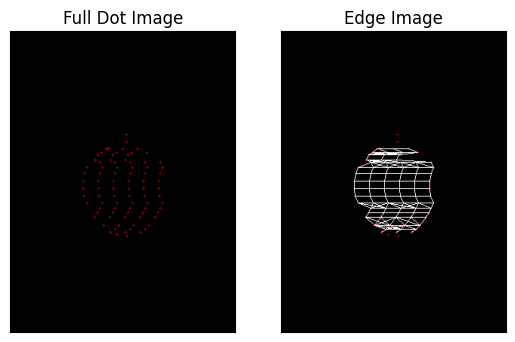

In [36]:
#working copy
edgeImg = fullDotImg.copy()

#add to edges array
edges = []
#edges = [[0, 1], [1, 2]]

for i in range(len(arr5)):
    # print(len(arr5[i]), arr5[i])
    for j in range(len(arr5[i])):
        if(len(arr5[i]) < 2):
            # print(arr5[i][j]['data'][0], arr5[i][j]['data'][1])
            #cv.line(edgeImg, (arr5[i][j]['data'][0], arr5[i][j]['data'][1]), (arr5[i+1][j]['data'][0], arr5[i+1][j]['data'][1]), (255, 255, 255), 1)
            # print(arr5[i][j]['id'])   
            edges.append([arr5[i][j]['id'], arr5[i+1][j]['id']])
        else:
            #when next array is larger than the current array
            # print(arr5[i])
            if (i != len(arr5)-1):
                if (len(arr5[i]) != len(arr5[i+1])):
                    #when j is not the last index
                    if (j != len(arr5[i])-1):
                        cv.line(edgeImg, (arr5[i][j]['data'][0], arr5[i][j]['data'][1]), (arr5[i][j+1]['data'][0], arr5[i][j+1]['data'][1]), (255, 255, 255), 1)
                        edges.append([arr5[i][j]['id'], arr5[i][j+1]['id']])
        
                        if (i != len(arr5)-1):  
                            tempDist = []
        
                            if(j == 0):
                                count = 0
                            else:
                                count = ind
        
                            for c in range(len(arr5[i+1]))[count::]:
                                x = pow(abs(arr5[i][j]['data'][0] - arr5[i+1][c]['data'][0]), 2)
                                y = pow(abs(arr5[i][j]['data'][1] - arr5[i+1][c]['data'][1]), 2)
                                dist = round(math.sqrt(x + y), 2)
        
                                cv.line(edgeImg, (arr5[i][j]['data'][0], arr5[i][j]['data'][1]), (arr5[i+1][c]['data'][0], arr5[i+1][c]['data'][1]), (255, 255, 255), 1)
                                edges.append([arr5[i][j]['id'], arr5[i+1][c]['id']])
                                tempDist.append(dist)
                                # print(arr5[i][j]['id'], arr5[i+1][c]['id'], tempDist)
                                
                                if (len(tempDist) > 0 and dist > tempDist[0]):
                                    edges.pop()
                                    ind = c-1
                                    break
                    # when j is the last index
                    else:
                        if(i != len(arr5)-1):
                            for c in range(len(arr5[i+1]))[ind::]:
                                cv.line(edgeImg, (arr5[i][j]['data'][0], arr5[i][j]['data'][1]), (arr5[i+1][len(arr5[i+1])-1]['data'][0], arr5[i+1][len(arr5[i+1])-1]['data'][1]), (255, 255, 255), 1)
                                edges.append([arr5[i][j]['id'], arr5[i+1][c]['id']])
                #when arrays are equal
                else:
                    if (j != len(arr5[i])-1):
                        cv.line(edgeImg, (arr5[i][j]['data'][0], arr5[i][j]['data'][1]), (arr5[i][j+1]['data'][0], arr5[i][j+1]['data'][1]), (255, 255, 255), 1)
                        edges.append([arr5[i][j]['id'], arr5[i][j+1]['id']])
                        if (i != len(arr5)-1):
                            cv.line(edgeImg, (arr5[i][j]['data'][0], arr5[i][j]['data'][1]), (arr5[i+1][j]['data'][0], arr5[i+1][j]['data'][1]), (255, 255, 255), 1)
                            edges.append([arr5[i][j]['id'], arr5[i+1][j]['id']])
                    else:
                        if(i != len(arr5)-1):
                            cv.line(edgeImg, (arr5[i][j]['data'][0], arr5[i][j]['data'][1]), (arr5[i+1][len(arr5[i+1])-1]['data'][0], arr5[i+1][len(arr5[i+1])-1]['data'][1]), (255, 255, 255), 1)
                            edges.append([arr5[i][j]['id'], arr5[i+1][len(arr5[i+1])-1]['id']])


print(edges)
print(len(edges))

plt.subplot(121),plt.imshow(fullDotImg)
plt.title('Full Dot Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edgeImg)
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

In [337]:
#testing faces

#edit mode -> select the whole obj -> F

# [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [5, 9], [5, 10], [5, 11], 
# [6, 7], [6, 11], [6, 12], [6, 13], [7, 8], [7, 13], [7, 14], [7, 15], [8, 15], [8, 16], [8, 17],
#[9, 10], [9, 18], [10, 11], [10, 18], [11, 12], [11, 18], [12, 13], [12, 18], [12, 19], 
#[13, 14], [13, 19], [14, 15], [14, 19], [14, 20], [15, 16], [15, 20], [16, 17], [16, 20], [16, 21], [17, 21], [17, 22],

faces = []
y = -1
arr = []

for i in range(len(edges))[:56:]:
    y1 = y
    # print('y1 ', y)
    
    if(edges[i][0] == edges[i+1][0] or edges[i][0] == edges[i-1][0]):
        y = edges[i][0]
        # print(y)
        
        y2 = y
        # print('y2 ',y)
        
        if(y1 != y2):
            arr = []
            temp = edges[i]
            print('temp ', temp)
            

        if (edges[i] != temp):
            arr.append(edges[i])
            # print('edge ', arr)


        if (len(arr) != 0):
            for j in range(len(arr)-1):
                # print('arr ', arr, len(arr))
                faces.append([arr[j][0], arr[j][1], arr[j+1][1]])
                if(len(faces) % 3 == 0):
                    faces.pop(-2)
                    faces.insert(-2, [temp[0], temp[1], arr[len(arr)-1][1]])
                    # print(faces)
                
            
                
            
print(faces)

temp  [5, 6]
temp  [6, 7]
temp  [7, 8]
temp  [8, 15]
temp  [9, 10]
temp  [10, 11]
temp  [11, 12]
temp  [12, 13]
temp  [13, 14]
temp  [14, 15]
temp  [15, 16]
temp  [16, 17]
temp  [17, 21]
temp  [18, 19]
temp  [19, 20]
temp  [20, 21]
temp  [21, 22]
temp  [22, 25]
temp  [23, 24]
[[5, 6, 11], [5, 9, 10], [5, 10, 11], [6, 7, 13], [6, 11, 12], [6, 12, 13], [7, 8, 15], [7, 13, 14], [7, 14, 15], [14, 15, 20], [8, 16, 17], [14, 19, 20], [19, 20, 25], [16, 20, 21], [19, 24, 25], [20, 25, 26], [21, 25, 26]]


[[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [5, 9], [6, 7], [6, 10], [7, 8], [7, 11], [8, 17]]
12


(Text(0.5, 1.0, 'Edge Image'), ([], []), ([], []))

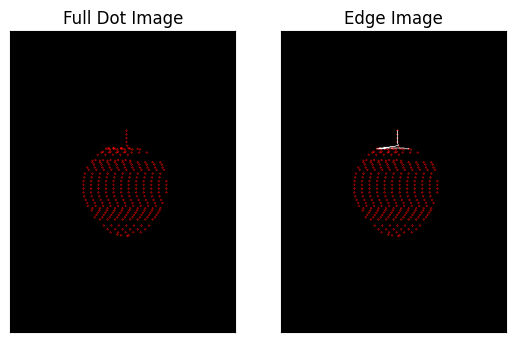

In [21]:
#create proper edges (original)
edgeImg = fullDotImg.copy()

#add to edges array
edges = []
#edges = [[0, 1], [1, 2]]

for i in range(len(arr5))[:6:]:
    # print(len(arr5[i]), arr5[i])
    for j in range(len(arr5[i])):
        if(len(arr5[i]) < 2):
            # print(arr5[i][j]['data'][0], arr5[i][j]['data'][1])
            cv.line(edgeImg, (arr5[i][j]['data'][0], arr5[i][j]['data'][1]), (arr5[i+1][j]['data'][0], arr5[i+1][j]['data'][1]), (255, 255, 255), 1)
            # print(arr5[i][j]['id'])   
            edges.append([arr5[i][j]['id'], arr5[i+1][j]['id']])
        else:
            # print(arr4[i][j], arr4[i+1][j])
            if (j != len(arr5[i])-1):
                cv.line(edgeImg, (arr5[i][j]['data'][0], arr5[i][j]['data'][1]), (arr5[i][j+1]['data'][0], arr5[i][j+1]['data'][1]), (255, 255, 255), 1)
                edges.append([arr5[i][j]['id'], arr5[i][j+1]['id']])
                if (i != len(arr5)-1):
                    cv.line(edgeImg, (arr5[i][j]['data'][0], arr5[i][j]['data'][1]), (arr5[i+1][j]['data'][0], arr5[i+1][j]['data'][1]), (255, 255, 255), 1)
                    edges.append([arr5[i][j]['id'], arr5[i+1][j]['id']])
            else:
                if(i != len(arr5)-1):
                    cv.line(edgeImg, (arr5[i][j]['data'][0], arr5[i][j]['data'][1]), (arr5[i+1][len(arr5[i+1])-1]['data'][0], arr5[i+1][len(arr5[i+1])-1]['data'][1]), (255, 255, 255), 1)
                    edges.append([arr5[i][j]['id'], arr5[i+1][len(arr5[i+1])-1]['id']])
print(edges)
print(len(edges))

plt.subplot(121),plt.imshow(fullDotImg)
plt.title('Full Dot Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edgeImg)
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

[[154, 137, 2.166666666666667], [154, 147, 2.25], [131, 155, 2.5]]


(Text(0.5, 1.0, 'Edge Image'), ([], []), ([], []))

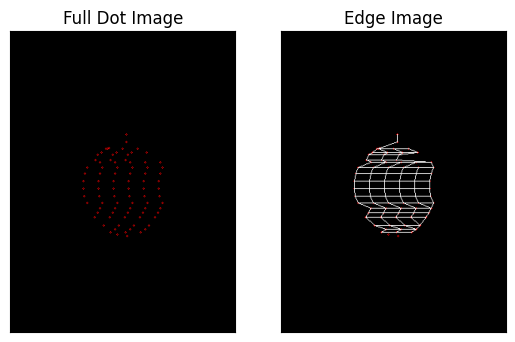

In [93]:
#create proper edges
edgeImg = fullDotImg.copy()

#add to edges array
edges = []
#edges = [[0, 1], [1, 2]]

for i in range(len(arr4)):
    # print(len(arr4[i]), arr4[i])
    for j in range(len(arr4[i])):
        # print(arr4[i][j])
        if(len(arr4[i]) < 2):
            cv.line(edgeImg, (arr4[i][j][0], arr4[i][j][1]), (arr4[i+1][j][0], arr4[i+1][j][1]), (255, 255, 255), 1)
        else:
            # print(arr4[i][j], arr4[i+1][j])
            if (j != len(arr4[i])-1):
                cv.line(edgeImg, (arr4[i][j][0], arr4[i][j][1]), (arr4[i][j+1][0], arr4[i][j+1][1]), (255, 255, 255), 1)
                if (i != len(arr4)-1):
                    cv.line(edgeImg, (arr4[i][j][0], arr4[i][j][1]), (arr4[i+1][j][0], arr4[i+1][j][1]), (255, 255, 255), 1)
            else:
                if(i != len(arr4)-1):
                    cv.line(edgeImg, (arr4[i][j][0], arr4[i][j][1]), (arr4[i+1][len(arr4[i+1])-1][0], arr4[i+1][len(arr4[i+1])-1][1]), (255, 255, 255), 1)

plt.subplot(121),plt.imshow(fullDotImg)
plt.title('Full Dot Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edgeImg)
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

In [110]:
for i in range(len(verts)-1):
    if (abs(verts[i][0] - verts[i+1][0]) < 30):
        edges.append([i,i+1])

print(edges)
print(len(edges))

[[0, 1], [1, 2], [2, 3], [3, 4], [5, 6], [6, 7], [7, 8], [9, 10], [10, 11], [11, 12], [13, 14], [14, 15], [15, 16], [17, 18], [18, 19], [20, 21], [21, 22], [22, 23], [23, 24], [24, 25], [25, 26], [26, 27], [27, 28], [28, 29], [29, 30], [31, 32], [32, 33], [33, 34], [34, 35], [35, 36], [37, 38], [38, 39], [39, 40], [40, 41], [41, 42], [43, 44], [44, 45], [45, 46], [46, 47], [47, 48], [49, 50], [50, 51], [51, 52], [52, 53], [53, 54], [54, 55], [55, 56], [56, 57], [57, 58], [58, 59], [59, 60], [61, 62], [62, 63], [63, 64], [64, 65], [66, 67], [67, 68], [68, 69], [69, 70], [71, 72], [72, 73], [73, 74], [74, 75], [75, 76], [77, 78], [78, 79], [79, 80], [81, 82], [82, 83], [84, 85], [85, 86], [86, 87], [87, 88]]
73


In [111]:
for i in range(len(edges)):
    edges.append([i,i+12]) #use this if unsolvable

print(edges)
print(len(edges))

[[0, 1], [1, 2], [2, 3], [3, 4], [5, 6], [6, 7], [7, 8], [9, 10], [10, 11], [11, 12], [13, 14], [14, 15], [15, 16], [17, 18], [18, 19], [20, 21], [21, 22], [22, 23], [23, 24], [24, 25], [25, 26], [26, 27], [27, 28], [28, 29], [29, 30], [31, 32], [32, 33], [33, 34], [34, 35], [35, 36], [37, 38], [38, 39], [39, 40], [40, 41], [41, 42], [43, 44], [44, 45], [45, 46], [46, 47], [47, 48], [49, 50], [50, 51], [51, 52], [52, 53], [53, 54], [54, 55], [55, 56], [56, 57], [57, 58], [58, 59], [59, 60], [61, 62], [62, 63], [63, 64], [64, 65], [66, 67], [67, 68], [68, 69], [69, 70], [71, 72], [72, 73], [73, 74], [74, 75], [75, 76], [77, 78], [78, 79], [79, 80], [81, 82], [82, 83], [84, 85], [85, 86], [86, 87], [87, 88], [0, 12], [1, 13], [2, 14], [3, 15], [4, 16], [5, 17], [6, 18], [7, 19], [8, 20], [9, 21], [10, 22], [11, 23], [12, 24], [13, 25], [14, 26], [15, 27], [16, 28], [17, 29], [18, 30], [19, 31], [20, 32], [21, 33], [22, 34], [23, 35], [24, 36], [25, 37], [26, 38], [27, 39], [28, 40], [29,

In [16]:
#test JSONlink
links = []
for i in range(len(edges))[:4:]:
    for j in range(len(edges[i])):
        if (j == 0):
            continue
        print (i, 'Name: ', edges[i][j])
        print (i, 'Parent: ', edges[i][j-1])
['A', 'B1', 'C2', 'D3', 'C4', 'D5']
[0, 10, 21, 32, 43]

0 Name:  1
0 Parent:  0
1 Name:  2
1 Parent:  1
2 Name:  3
2 Parent:  2
3 Name:  4
3 Parent:  3


[0, 10, 21, 32, 43]

In [33]:
links = []
for i in range(len(verts))[:4:]:
    if (i == 0):
        print (i, 'Name: ', verts[i])
        print (i, 'Parent: None')
    else:
        print (i, 'Name: ', verts[i])
        print (i, 'Parent: ', verts[i-1], i-1)

#[152, 131, 0.0], [154, 137, 0.0], [154, 147, 0.0], [131, 155, 0.0]

#[152, 131, 0.0] None
[154, 137, 0.0] [152, 131, 0.0]
[154, 147, 0.0] [154, 137, 0.0]
[131, 155, 0.0] [154, 147, 0.0]

['None', '[152, 131, 0.0]', '[154, 137, 0.0]', '[154, 147, 0.0]']

[[152, 131, 0.0], [154, 137, 0.0], [154, 147, 0.0], [131, 155, 0.0]]

[[152, 131, 0.0], [154, 137, 0.0], [154, 147, 0.0], [131, 155, 0.0], [131, 155, 0.0], [154, 147, 0.0], [131, 155, 0.0], [131, 155, 0.0], [154, 137, 0.0], [154, 147, 0.0], [131, 155, 0.0], [131, 155, 0.0], [154, 147, 0.0], [131, 155, 0.0], [131, 155, 0.0], [154, 137, 0.0], [154, 147, 0.0], [131, 155, 0.0], [131, 155, 0.0], [154, 147, 0.0], [131, 155, 0.0], [131, 155, 0.0], [154, 147, 0.0], [131, 155, 0.0], [131, 155, 0.0], [131, 155, 0.0]]
['None', [152, 131, 0.0], [154, 137, 0.0], [154, 147, 0.0], [154, 147, 0.0], [154, 137, 0.0], [154, 147, 0.0], [154, 147, 0.0], [152, 131, 0.0], [154, 137, 0.0], [154, 147, 0.0], [154, 147, 0.0], [154, 
137, 0.0], [154, 147, 0.0], [154, 147, 0.0], [152, 131, 0.0], [154, 137, 0.0], [154, 147, 0.0], [154, 147, 0.0], [154, 137, 0.0], [154, 147, 0.0], [154, 147, 0.0], [154, 137, 0.0], [154, 147, 0.0], [154, 147, 0.0], [154, 147, 0.0]]

[0, 1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3]
['None', 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2]

[1, 2, 3, 1, 2, 3, 2, 3, 3]
[0, 1, 2, 0, 1, 2, 1, 2, 2]


0 Name:  [152, 131, 0.0]
0 Parent: None
1 Name:  [154, 137, 0.0]
1 Parent:  [152, 131, 0.0] 0
2 Name:  [154, 147, 0.0]
2 Parent:  [154, 137, 0.0] 1
3 Name:  [131, 155, 0.0]
3 Parent:  [154, 147, 0.0] 2


In [75]:
gene_spec =  {
    "x":{"scale":20, "ind":0}, 
    "y": {"scale":20, "ind":1},
    "z": {"scale":20, "ind":2},
    "connected_to": {"scale:": 0, "data": [], "ind":3}
    "fitness_val": {"scale:": 0, "data": 0, "ind":3}
}

{'x': np.float64(16.1108367747244), 
 'y': np.float64(3.2669416781744665), 
 'z': np.float64(17.988440038299018), 
 'connected_to': np.float64(0.0), 
 'fitness_val': np.float64(0.0)}

{'scale': 20, 'ind': 0}
{'scale': 20, 'ind': 1}
{'scale': 20, 'ind': 2}
[]
0


In [53]:
import random
#crossover 
p = random.randint(50, 100)
print(p)
print(p/100)
n = abs(129-135)
print(n)

dist = round(n * p/100)
print(dist)

x = 129 + dist #p with lower f.val + dist toward p with higher f.val 
y = 135 - dist #p with higher f.val - dist -> toward p with lower f.val 
print(x, y)


82
0.82
6
5
134 130


In [20]:
import random
#crossover test
g1 = {'id': 5, 'data': [164, 156, 22.022727272727273], 'fitness_val': 1.6}
g2 = {'id': 5, 'data': [149, 156, 12.022727272727273], 'fitness_val': 1.3}
g3 = g1.copy()
g3['fitness_val'] = 0

p = random.randint(50, 100)
print(p)
print(p/100)

if (g1['fitness_val'] > g2['fitness_val']):
    fittest = g1
    lessFittest = g2
else:
    fittest = g2
    lessFittest = g1
    
print("Fittest: ", fittest)
print("Less fittest: ", lessFittest)

x = abs(g1['data'][0] - g2['data'][0])
print(x)

distX = round(x * p/100)
print(distX)

#check x vals
if(fittest['data'][0] > lessFittest['data'][0]):
    fittestXLarger = True
else:
    fittestXLarger = False

print(fittestXLarger)

#toward p with lower f.val
if (fittestXLarger):
    g3['data'][0] = fittest['data'][0] - distX 
else:
    g3['data'][0] = fittest['data'][0] + distX

z = abs(g1['data'][2] - g2['data'][2])
print(z)

distZ = round(z * p/100)
print(distZ)

#check z vals
if(fittest['data'][2] > lessFittest['data'][2]):
    fittestZLarger = True
else:
    fittestZLarger = False

print(fittestZLarger)

#toward p with higher f.val
if (fittestZLarger):
    g3['data'][2] = lessFittest['data'][2] + distZ 
else:
    g3['data'][2] = lessFittest['data'][2] - distZ
    
print(g3)

80
0.8
Fittest:  {'id': 5, 'data': [164, 156, 22.022727272727273], 'fitness_val': 1.6}
Less fittest:  {'id': 5, 'data': [149, 156, 12.022727272727273], 'fitness_val': 1.3}
15
12
True
10.0
8
True
{'id': 5, 'data': [152, 156, 20.022727272727273], 'fitness_val': 0}


In [5]:
import random
g3 = {'id': 5, 'data': [149, 156, 12.02272], 'fitness_val': 0}

#mutation
rate = 0.1
# r = random.randint(0, 10)
r = 10
rp = r/100

print(r, rp)

if (rp < rate):
    g3['data'][2] += r
    print ('yes')
print(g3)

10 0.1
{'id': 5, 'data': [149, 156, 12.02272], 'fitness_val': 0}


In [23]:
import copy

a = [[1, 2, 3], [4, 5, 6]]

# Creating a deep copy of the nested list 'a'
b = copy.deepcopy(a)

print(b)

# Modifying an element in the deep-copied list
b[0][0] = 99 
print(a)
print(b)

[[1, 2, 3], [4, 5, 6]]
[[1, 2, 3], [4, 5, 6]]
[[99, 2, 3], [4, 5, 6]]
